<a href="https://colab.research.google.com/github/krishnamhn009/datascience/blob/master/Adult_Census_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Income Data

In [3]:
#import necessary libraries
import pandas as pd
import pandas as pd
import numpy as np

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

#read the data from csv file
dataset = pd.read_csv("adult.csv" , na_values= "?")

In [ ]:
#print top rows from the dataset
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
#check for null values
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
#checking for numerical and categorical attributes
continuous_attributes = dataset.select_dtypes(include = np.number).columns.tolist() 
categorical_attributes = dataset.select_dtypes(include = np.object).columns.tolist()

In [ ]:
#fill null values
dataset = dataset.fillna(dataset[categorical_attributes].mode().iloc[0])
dataset.fillna(np.mean(dataset))

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [6]:
#Dividng the dataset into dependent (X) and independent variable (y)
Y= dataset["income"]
X = dataset.drop('income', axis=1)

In [ ]:
#replace string to numeric
Y.replace(('<=50K', '>50K'), (0, 1), inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


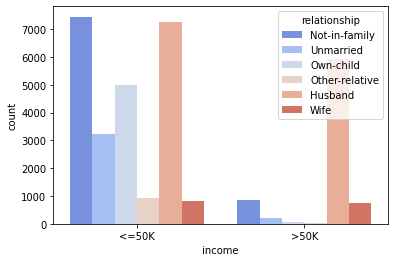

In [4]:
sns.countplot(dataset['income'], palette='coolwarm', hue='relationship', data=dataset);

In [7]:
dataset.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


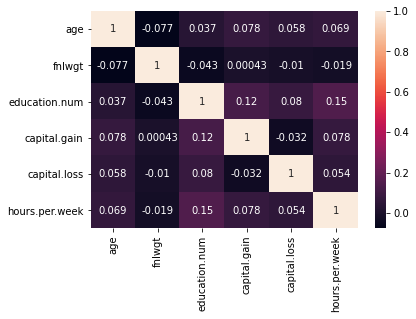

In [8]:
sns.heatmap(dataset.corr(), annot=True);

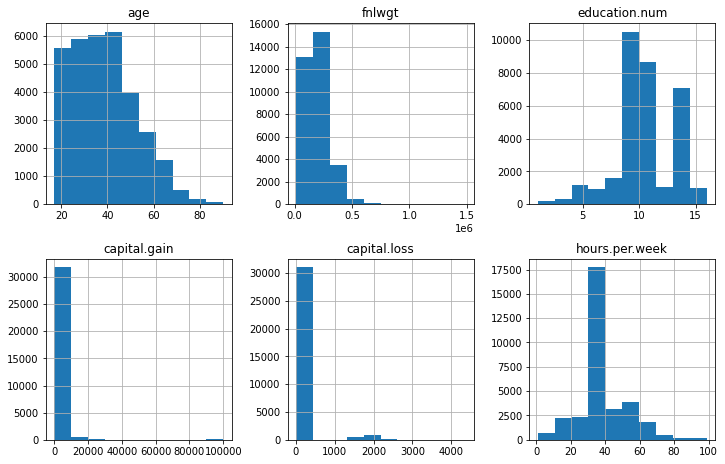

In [9]:
#Histogram

dataset.hist(figsize=(12,12), layout=(3,3), sharex=False);

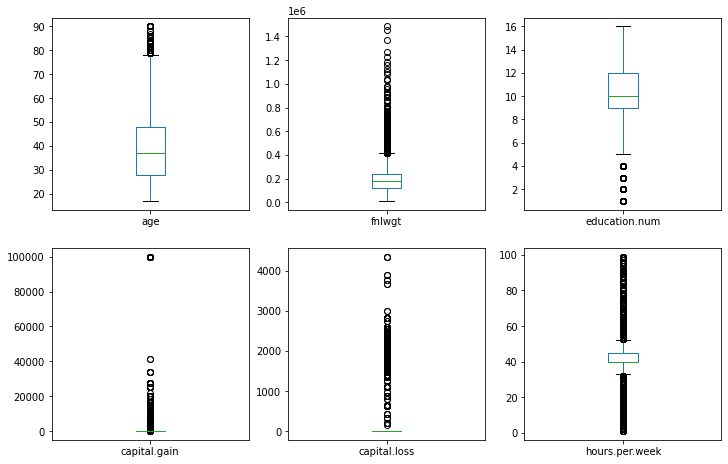

In [10]:
#BoxPlot
dataset.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


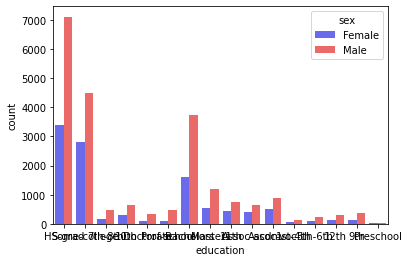

In [12]:
sns.countplot(dataset['education'], hue='sex', data=dataset, palette='seismic');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


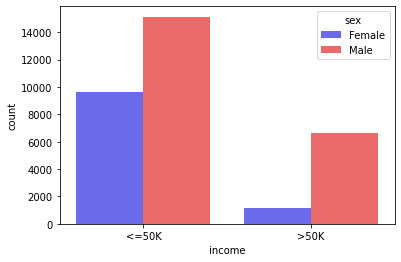

In [13]:
sns.countplot(dataset['income'], hue='sex', data=dataset, palette='seismic');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


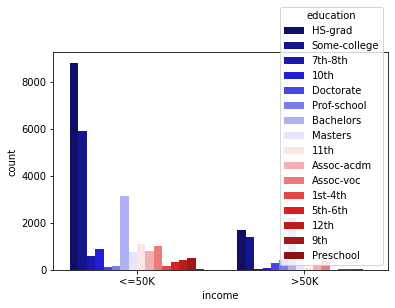

In [14]:
sns.countplot(dataset['income'], hue='education', data=dataset, palette='seismic');

In [ ]:
#spilliting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 17)

In [5]:
#label encoding the categorical variables
from sklearn import preprocessing
categorical_variables = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical_variables:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

NameError: ignored

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = X_train.columns

temp_train = X_train.copy()
temp_test = X_test.copy()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = cols)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = cols)

print(X_train.head())
print(X_test.head())

        age  workclass    fnlwgt  education  education.num  marital.status  \
0  0.616232  -0.081718 -0.507004   0.182593      -0.423176       -0.404471   
1  0.982717  -0.081718 -0.636459   0.182593      -0.423176        0.924447   
2 -1.142896  -0.081718 -0.596405  -1.110199      -1.976189        0.924447   
3  0.103153   2.628716 -1.228704   1.216826      -0.034923       -1.733389   
4 -0.629817   1.725238  0.974048   1.216826      -0.034923       -0.404471   

   occupation  relationship      race       sex  capital.gain  capital.loss  \
0    0.214016      -0.89997 -3.137919  0.703222     -0.145913     -0.215738   
1    0.717625       1.58729  0.393477 -1.422027     -0.145913      0.592249   
2    0.214016       1.58729 -1.960787 -1.422027     -0.145913     -0.215738   
3   -1.548614       1.58729  0.393477 -1.422027     -0.145913     -0.215738   
4    1.221234      -0.89997 -4.315051  0.703222     -0.145913     -0.215738   

   hours.per.week  native.country  
0       -1.249725   

In [ ]:
#modeling BernoulliNB
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, Y_train)
print(BernNB)

#evaluating and plotting confusion matrix
Y_expect = Y_test
Y_pred_bernoulli = BernNB.predict(X_test)
print(accuracy_score(Y_expect, Y_pred_bernoulli))
print(confusion_matrix(Y_expect, Y_pred_bernoulli))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8020881314294488
[[4767  208]
 [1081  457]]


In [ ]:
#normalizing the data as multinominal doesn't accept negative values
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X_train_minmax = pd.DataFrame(minmax.fit_transform(temp_train), columns = X.columns)

X_test_minmax = pd.DataFrame(minmax.transform(temp_test), columns = X.columns)

In [ ]:
#modeling MultinominalNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_minmax, Y_train)
y_pred_multinomial = mnb.predict(X_test_minmax)

In [ ]:
#plotting confusion matrix and evaluating accuracy
print("CONFUSION MATRIX:\n")
print(confusion_matrix(Y_test, y_pred_multinomial),"\n\n")
print("Accuracy of gaussian:\n")
print(accuracy_score(Y_test, y_pred_multinomial))

CONFUSION MATRIX:

[[4974    1]
 [1511   27]] 


Accuracy of gaussian:

0.7678489175495163


In [ ]:
#modeling GaussianNB
GausNB = GaussianNB()

GausNB.fit(X_train, Y_train)
print(GausNB)

#showing accuracy and plotting confusion matrix
Y_pred_gaussian = GausNB.predict(X_test)
print(accuracy_score(Y_expect, Y_pred_gaussian))
print(confusion_matrix(Y_expect, Y_pred_gaussian))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8036235221863964
[[4696  279]
 [1000  538]]


In [ ]:
#displaying decision boundary
import matplotlib.pyplot as plt
def plot_decisionboundary(classifier_plt, xx, yy):
    colors = "rgb"
    Z = classifier_plt.predict(np.c_[xx.ravel(), yy.ravel()])
    pd.DataFrame(Z,columns=['hi'])['hi'].value_counts()
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    cs = plt.contourf(xx,yy,  Z, cmap = ListedColormap(('red', 'green', 'blue', 'yellow')))
    plt.subplot(1,2,2)
    cs = plt.contourf(xx,yy,  Z, cmap = ListedColormap(('red', 'green', 'blue', 'yellow')))


    # Plot also the training points
    for i, color in zip(classifier_plt.classes_, colors):
        idx = np.where(Y_train == i)
        plt.subplot(1,2,1)
        plt.scatter(X_train.values[idx, 0], X_train.values[idx, 1], c=color, label=['0', '1'][i],cmap = ListedColormap(('red', 'green', 'blue', 'yellow')), edgecolor='black', s=20)
        plt.axis('tight')
        plt.subplot(1,2,2)
        idx = np.where(Y_test == i)
        plt.scatter(X_test.values[idx, 0], X_test.values[idx, 1], c=color, label=['0', '1'][i],cmap = ListedColormap(('red', 'green', 'blue', 'yellow')), edgecolor='black', s=20)

    plt.title("Plot the decision boundary, visualize training and test results")
    plt.legend()

In [ ]:
from matplotlib.colors import ListedColormap
h = 0.01 # step size in the mesh
x = 1

x1_min, x1_max = X_train.values[:, 0].min() - x, X_train.values[:, 0].max() + x
y1_min, y1_max = X_train.values[:, 1].min() - x, X_train.values[:, 1].max() + x

xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(y1_min, y1_max, h))

C:\Users\ajang\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


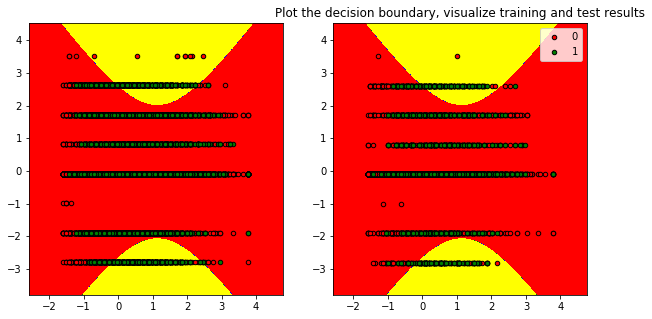

In [ ]:
#decision boundary for GaussianNB
gnb_t = GaussianNB()
gnb_t.fit(X_train.values[:, :2], Y_train)
plot_decisionboundary(gnb_t, xx1, yy1)

C:\Users\ajang\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


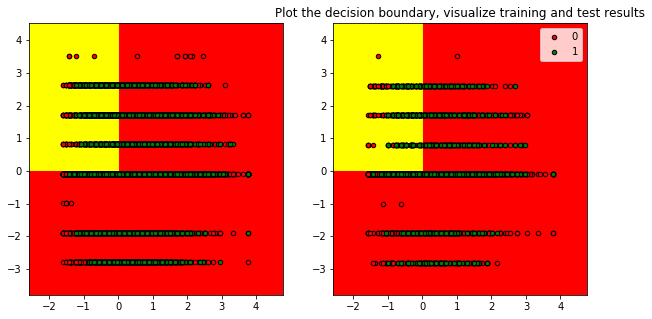

In [ ]:
#decision boundary for BernoulliNB
bnb_t = BernoulliNB()
bnb_t.fit(X_train.values[:, [2, 11]], Y_train)
plot_decisionboundary(bnb_t, xx1, yy1)

C:\Users\ajang\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


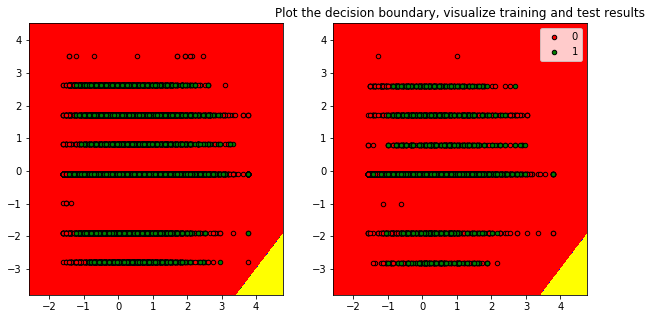

In [ ]:
#decision boundary for MultinominalNB
mnb_t = MultinomialNB()
mnb_t.fit(X_train_minmax.values[:, :2], Y_train)
plot_decisionboundary(mnb_t, xx1, yy1)

In [ ]:
dataset = pd.DataFrame({'Actual': Y_test.values[:,], 'Gaussian_Predicted': Y_pred_gaussian[:,], 'Bernoulli_Predicted': Y_pred_bernoulli[:, ], 'Multinomial_Predicted': y_pred_multinomial[:, ]})

In [ ]:
#generating csv file of test results
dataset.to_csv('output_test.csv')